# ML Assignment – 4 (Clustering, Anomaly Detection, Time Series)  
**Submitter Name:** Aasif Majeed  
**Date:** 24 May 2024  

> **Note:** The PDF header shows “Assignment – 5 (ML)”, but your uploaded file is `24_may_2024_assignment4.pdf`, so this notebook is named **Assignment – 4**.

This notebook answers **all questions (1–60)** with **detailed explanations and examples**.


---
## 0) Imports (optional demo code)
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 160)


---
# Answers (1–60)
---

## Q1) What is clustering in machine learning?

**Clustering** is an **unsupervised learning** technique that groups data points so that points in the same group (cluster) are more similar to each other than to points in other clusters.

- Similarity is defined using a **distance/similarity measure** (e.g., Euclidean distance, cosine similarity).
- There are **no labels** (unlike classification). The model discovers structure by itself.

**Example:**  
If you have customers with features like (age, income, spending score), clustering can group them into segments like:
- “High income – high spending”  
- “Low income – low spending”  
- “Young – impulsive buyers”


## Q2) Explain the difference between supervised and unsupervised clustering.

Clustering is typically **unsupervised** by default, but sometimes people discuss “supervised vs unsupervised clustering” in the sense of whether labels/constraints guide grouping.

### Unsupervised clustering
- No labels are provided.
- Algorithm groups points purely from feature similarity.
- Examples: **K-means, DBSCAN, Hierarchical clustering**.

### Supervised / semi-supervised clustering (label-guided clustering)
- Some label information or constraints are available.
- You might use **must-link/cannot-link constraints** or a small set of labeled points to shape clusters.
- Called **constrained clustering** or **semi-supervised clustering**.

**Example:**  
In face clustering, if you know two photos are the same person, you can enforce a *must-link* constraint so they stay in the same cluster.


## Q3) What are the key applications of clustering algorithms?

Key applications of clustering:

1. **Customer segmentation** (marketing, personalization)
2. **Document clustering** (topic discovery in news/articles)
3. **Image segmentation** (grouping pixels into regions)
4. **Recommendation systems** (group similar users/items)
5. **Anomaly detection** (points far from clusters may be anomalies)
6. **Bioinformatics** (gene expression clustering)
7. **Data summarization** (represent data using cluster centers)

**Example:**  
A streaming platform can cluster users by watch history to recommend content to each cluster.


## Q4) Describe the K-means clustering algorithm.

**K-means clustering** partitions data into **K clusters** by minimizing within-cluster squared distance.

### Objective
Minimize:
\[
\sum_{k=1}^{K} \sum_{x \in C_k} \|x - \mu_k\|^2
\]
where \(\mu_k\) is the centroid of cluster \(k\).

### Steps
1. Choose K initial centroids (random or **k-means++**).
2. Assign each point to the nearest centroid.
3. Recompute each centroid as the mean of points in its cluster.
4. Repeat until convergence (centroids stop changing).

**Example:**  
If K=3 on a dataset of fruits (weight, sweetness), it may find clusters like “apples”, “bananas”, “oranges” based on feature patterns.


## Q5) What are the main advantages and disadvantages of K-means clustering?

### Advantages of K-means
- Simple and fast (scales well to large datasets)
- Works well for compact, spherical clusters
- Easy to interpret (centroids represent prototypes)

### Disadvantages of K-means
- Must choose **K** beforehand
- Sensitive to initialization (local minima)
- Assumes spherical, equal-density clusters
- Sensitive to outliers (centroid can shift)
- Struggles with non-convex shapes

**Example:**  
For “two moons” shaped clusters, K-means fails because clusters are not spherical; **DBSCAN** or **spectral clustering** works better.


## Q6) How does hierarchical clustering work?

**Hierarchical clustering** builds a hierarchy of clusters, visualized as a **dendrogram**.

### Agglomerative (bottom-up) – most common
1. Start with each point as its own cluster.
2. Find the two closest clusters (using a linkage criterion).
3. Merge them.
4. Repeat until all points are in one cluster.

### Divisive (top-down)
- Start with all points in one cluster and split recursively.

To get final clusters, you “cut” the dendrogram at a chosen height.

**Example:**  
If you cut higher, you get fewer big clusters; cut lower, you get many smaller clusters.


## Q7) What are the different linkage criteria used in hierarchical clustering?

Linkage criteria define distance between clusters in hierarchical clustering:

1. **Single linkage**: min distance between any pair of points (can cause chaining)
2. **Complete linkage**: max distance between any pair (compact clusters)
3. **Average linkage**: average distance between all point pairs
4. **Ward linkage**: merges clusters that minimize increase in within-cluster variance (good for Euclidean data)

**Example:**  
Single linkage can join points along a curve into one “chain” cluster, while complete linkage avoids chaining.


## Q8) Explain the concept of DBSCAN clustering.

**DBSCAN** is a density-based clustering algorithm that forms clusters as dense regions separated by sparse regions.

It classifies points as:
- **Core**: enough neighbors within radius eps
- **Border**: near a core point but not dense enough to be core
- **Noise**: not reachable from any core point

Pros:
- Finds clusters of arbitrary shapes
- Detects noise/outliers
- No need to choose K

**Example:**  
DBSCAN can correctly cluster “two moons” because it follows dense curved structures.


## Q9) What are the parameters involved in DBSCAN clustering?

DBSCAN parameters:

1. **eps (ε)**: neighborhood radius. Points within eps are neighbors.
2. **min_samples (MinPts)**: minimum number of points inside eps-neighborhood to be a **core** point.

Effects:
- Larger eps → clusters merge, fewer outliers
- Smaller eps → more noise, fragmented clusters
- Larger min_samples → stricter density, more points become noise

**Example:**  
If eps is too small, even dense regions may break into many clusters.


## Q10) Describe the process of evaluating clustering algorithms?

Evaluating clustering can be done using:

### Internal metrics (no labels needed)
- **Silhouette score**
- Davies–Bouldin index (lower is better)
- Calinski–Harabasz score (higher is better)
- WCSS (K-means)

### External metrics (if true labels exist)
- Adjusted Rand Index (ARI)
- Normalized Mutual Information (NMI)
- Purity

### Practical evaluation
- Visualize clusters (PCA/t-SNE projections)
- Stability across different samples
- Downstream usefulness (e.g., better customer targeting)

**Example:**  
If clusters are used for marketing, good clusters should show clearly different purchasing behaviors.


## Q11) What is the silhouette score, and how is it calculated?

Silhouette score measures how well a point fits inside its cluster:

For point i:
- **a(i)** = average distance to points in same cluster
- **b(i)** = minimum average distance to points in nearest other cluster

\[
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
\]

Range: -1 to +1
- Near +1 → well clustered
- Near 0 → on boundary
- Negative → likely misclustered

**Example:**  
If clusters overlap, silhouette tends to be low because b(i) ≈ a(i).


## Q12) Discuss the challenges of clustering high-dimensional data.

High-dimensional clustering challenges:

- **Curse of dimensionality**: distances become less meaningful; nearest and farthest points become similar.
- **Sparsity**: points spread out; density estimation becomes hard (hurts DBSCAN).
- **Noise features**: irrelevant dimensions mask true structure.
- Higher computation cost.

Solutions:
- Feature selection
- Dimensionality reduction (PCA, UMAP, autoencoders)
- Better similarity metrics (cosine for text)
- Subspace clustering methods

**Example:**  
Text vectors with 50,000 TF-IDF features are often reduced using Truncated SVD before clustering.


## Q13) Explain the concept of density-based clustering.

**Density-based clustering** forms clusters as connected dense regions.

Key properties:
- Handles **arbitrary shapes**
- Can label sparse points as **noise**
- Works well when clusters are separated by low-density gaps

Algorithms: DBSCAN, HDBSCAN, OPTICS

**Example:**  
Taxi pickup locations form dense hotspots in cities → density clustering identifies them naturally.


## Q14) How does Gaussian Mixture Model (GMM) clustering differ from K-means?

**K-means vs GMM**

K-means:
- Hard assignment (each point belongs to one cluster)
- Assumes spherical clusters with similar variance
- Minimizes squared distance to centroids

GMM:
- Probabilistic model: mixture of Gaussians
- Soft assignment (membership probabilities)
- Can model elliptical clusters via covariance matrices
- Typically fit using EM algorithm

**Example:**  
If clusters overlap and are elongated, GMM provides better modeling than K-means.


## Q15) What are the limitations of traditional clustering algorithms?

Limitations of traditional clustering:
- K-means assumes spherical clusters and requires K.
- Hierarchical clustering can be expensive (O(n²)) for large datasets.
- Sensitive to scaling and outliers.
- Struggles in high-dimensional settings.
- Many methods cannot handle mixed numerical + categorical data easily.

**Example:**  
Hierarchical clustering on 100k points is often impractical without approximations due to memory/time.


## Q16) Discuss the applications of spectral clustering.

**Spectral clustering** uses graph-based methods:
1. Build a similarity graph between points.
2. Compute graph Laplacian.
3. Use eigenvectors to embed data into lower-dimensional “spectral” space.
4. Run K-means in that space.

Works well for non-convex clusters.

Applications:
- Image segmentation (pixels as nodes, similarity edges)
- Community detection in networks
- Clustering based on similarity matrices

**Example:**  
Two-moons data: spectral clustering separates moons successfully, unlike K-means.


## Q17) Explain the concept of affinity propagation.

**Affinity propagation** finds clusters by selecting representative points called **exemplars**.

- No need to pre-specify K.
- Uses message passing:
  - **Responsibility**: how suitable k is as exemplar for i
  - **Availability**: how appropriate it is for i to choose k

Pros:
- Automatically finds number of clusters
Cons:
- Requires full similarity matrix → O(n²) memory

**Example:**  
In product clustering, exemplars can be actual products representing each cluster.


## Q18) How do you handle categorical variables in clustering?

Handling categorical variables in clustering:

1. **One-hot encoding** + K-means (works if not too many categories)
2. **Gower distance** (for mixed numeric + categorical data) + hierarchical clustering
3. **K-modes** for purely categorical data (uses mode and matching distance)
4. **K-prototypes** for mixed data
5. **Embeddings** for high-cardinality categories

**Example:**  
Customer data with city and gender: use Gower distance to properly measure similarity across mixed features.


## Q19) Describe the elbow method for determining the optimal number of clusters.

Elbow method for choosing K (for K-means):

1. Run K-means for K = 1..Kmax.
2. Record WCSS (inertia) for each K.
3. Plot WCSS vs K.
4. Choose K at the “elbow” where improvement slows down.

**Example:**  
If WCSS drops sharply until K=4 and flattens afterwards, K≈4 is a good choice.


## Q20) What are some emerging trends in clustering research?

Emerging trends in clustering:
- Deep clustering (learn embeddings + clustering jointly)
- Self-supervised representations for better clusters
- Scalable clustering (streaming, distributed)
- HDBSCAN/OPTICS for variable-density clustering
- Graph clustering and community detection
- Fairness and explainability in clustering
- Multi-view / multi-modal clustering

**Example:**  
Deep clustering in images learns latent representations so clusters correspond to semantic categories (cars, dogs, etc.).


## Q21) What is anomaly detection, and why is it important?

**Anomaly detection** identifies rare patterns that deviate from normal behavior.

Importance:
- Detect fraud, defects, intrusions, failures early
- Prevent financial loss and safety risks

**Example:**  
A sudden spike in server CPU usage at midnight might indicate an attack or runaway process.


## Q22) Discuss the types of anomalies encountered in anomaly detection.

Types of anomalies:
1. **Point anomaly**: single unusual data point (e.g., extremely large transaction).
2. **Contextual anomaly**: abnormal in a specific context (e.g., high usage at unusual time).
3. **Collective anomaly**: a sequence/group is abnormal (e.g., burst of small requests in DDoS).

**Example:**  
One spike in temperature is point anomaly; a sustained rising pattern is collective anomaly.


## Q23) Explain the difference between supervised and unsupervised anomaly detection techniques.

Supervised vs Unsupervised anomaly detection:

### Supervised
- Requires labeled normal/anomaly examples.
- Train a classifier.
- Good if anomaly patterns are known.

### Unsupervised
- No labels; assumes anomalies are rare and different.
- Methods: Isolation Forest, LOF, clustering-based, reconstruction error.

### Semi-supervised (common)
- Train on normal data only and detect deviations (novelty detection).

**Example:**  
Fraud detection sometimes supervised; machine-failure detection often unsupervised/semi-supervised.


## Q24) Describe the Isolation Forest algorithm for anomaly detection.

**Isolation Forest** isolates anomalies using random decision trees.

- Randomly select a feature and split value.
- Anomalies get isolated in fewer splits → shorter path length.
- Average path length across trees gives anomaly score.

Pros: fast, scalable, works well in high dimensions.
**Example:**  
A rare transaction with extreme amount is isolated quickly, so it gets high anomaly score.


## Q25) How does One-Class SVM work in anomaly detection?

**One-Class SVM** learns the boundary of normal data and flags points outside as anomalies.

- Uses kernels (RBF common) to model nonlinear boundaries.
- Parameter ν controls fraction of anomalies allowed.
- Needs scaling and can be slower on huge data.

**Example:**  
Train on normal network traffic; malicious traffic outside boundary is detected as anomaly.


## Q26) Discuss the challenges of anomaly detection in high-dimensional data.

High-dimensional anomaly detection challenges:
- Distances lose meaning (hurts LOF/kNN)
- Density estimation becomes difficult
- Many irrelevant features hide anomalies
- Computational cost increases

Solutions:
- Dimensionality reduction (PCA, autoencoders)
- Isolation-based models (Isolation Forest)
- Representation learning

**Example:**  
For cybersecurity logs with thousands of features, learn embeddings first, then detect anomalies in embedding space.


## Q27) Explain the concept of novelty detection.

**Novelty detection** detects data points that are new/unseen compared to a clean normal training set.

- Training set is assumed to contain only normal samples.
- Model learns “normal boundary” and flags deviations.

Methods: One-Class SVM, autoencoders, Gaussian models.

**Example:**  
Train on normal machine vibration signals; later fault signals are “novel” anomalies.


## Q28) What are some real-world applications of anomaly detection?

Real-world anomaly detection applications:
- Credit card fraud
- Intrusion detection
- Predictive maintenance
- Healthcare monitoring (abnormal vitals)
- Quality inspection (defects)
- Network monitoring (traffic spikes)

**Example:**  
Factories monitor sensors; abnormal vibration indicates machine failure.


## Q29) Describe the Local Outlier Factor (LOF) algorithm.

**Local Outlier Factor (LOF)** detects anomalies by comparing local density of a point with densities of its neighbors.

- Compute k-nearest neighbors.
- Estimate local reachability density (LRD).
- LOF = avg(neighbor density / point density).
- LOF ≈ 1 → normal, LOF >> 1 → outlier.

**Example:**  
A point near a sparse area next to a dense cluster has low density → LOF flags it.


## Q30) How do you evaluate the performance of an anomaly detection model?

Evaluation of anomaly detection:

### With labels
- Precision, Recall, F1
- ROC-AUC, PR-AUC (better for imbalanced)
- Confusion matrix
- Cost-based evaluation

### Without labels
- Manual inspection of top anomalies
- Stability tests
- Compare anomaly rates across time/segments
- Inject synthetic anomalies for benchmarking

**Example:**  
Fraud: prioritize high recall (catch fraud) but also keep precision reasonable to avoid analyst overload.


## Q31) Discuss the role of feature engineering in anomaly detection.

Feature engineering helps anomalies become detectable.

Examples:
- Ratios: current spend / average spend (user baseline)
- Rolling statistics in time series (moving mean, std, z-score)
- Interaction features (location change + time change)
- Log transforms for heavy-tailed distributions
- Proper encoding of categories

**Example:**  
Raw spend may look normal, but “spend relative to user’s last 30-day average” reveals unusual behavior.


## Q32) What are the limitations of traditional anomaly detection methods?

Limitations of traditional methods:
- Assume anomalies are rare and far from normal (not always)
- Sensitive to scaling and outliers
- Hard to evaluate without labels
- Cannot handle concept drift well
- Often provide weak explanations

**Example:**  
A z-score method fails for seasonal data because “high in December” may be normal.


## Q33) Explain the concept of ensemble methods in anomaly detection.

Ensemble anomaly detection combines multiple detectors to improve robustness.

- Score averaging or voting (LOF + IsolationForest + PCA error)
- Model ensembles (Isolation Forest itself is ensemble of trees)
- Stacking (meta-model) if some labels exist

**Example:**  
LOF finds local density anomalies while Isolation Forest finds global isolated points. Combining scores catches more types of anomalies.


## Q34) How does autoencoder-based anomaly detection work?

Autoencoder anomaly detection:
- Train autoencoder to reconstruct **normal** data.
- Compute reconstruction error \(\|x-\hat{x}\|\).
- High error → anomaly.

Works well for complex, nonlinear patterns.
Variants: denoising AE, VAE, sequence AE (LSTM) for time series.

**Example:**  
Normal images reconstruct well; defective product images reconstruct poorly → high error.


## Q35) What are some approaches for handling imbalanced data in anomaly detection?

Handling imbalance:
- Use PR-AUC, F1, recall (not accuracy)
- Tune threshold and costs
- Resampling (oversample anomalies, undersample normal) if supervised
- Class weights / cost-sensitive learning
- Semi-supervised learning on normal data

**Example:**  
In fraud, you may accept more false positives to increase recall.


## Q36) Describe the concept of semi-supervised anomaly detection.

Semi-supervised anomaly detection:
- Train on labeled normal data only (or mostly normal).
- Detect points that deviate from normal boundary.

Methods: One-Class SVM, autoencoder on normal, Gaussian density model.

**Example:**  
Train on healthy ECG signals; detect abnormal ECG patterns later.


## Q37) Discuss the trade-offs between false positives and false negatives in anomaly detection.

False positive vs false negative trade-off:
- FP: normal flagged → wasted effort, alarm fatigue.
- FN: anomaly missed → financial loss, failures, safety risk.

Choose threshold based on cost:
- medical/safety: minimize FN (high recall)
- operations/analysts: minimize FP (high precision)

**Example:**  
In medical monitoring, missing a dangerous anomaly is worse than extra alerts.


## Q38) How do you interpret the results of an anomaly detection model?

Interpreting results:
- Examine anomaly score and threshold.
- Investigate top anomalies and compare with normal baselines.
- Explain features causing anomaly (z-scores, SHAP, per-feature recon error).
- Check context (time, user segment) for validation.
- Human review if needed.

**Example:**  
A transaction flagged: show amount is 10× usual, location changed, and time is unusual.


## Q39) What are some open research challenges in anomaly detection?

Open challenges:
- Concept drift and non-stationary behavior
- Few/no labels (evaluation difficulty)
- Explainability
- Adversarial attacks (evasion)
- Multimodal anomalies (text + time series + graphs)
- Very rare events
- Realistic benchmarks

**Example:**  
Cyber attackers adapt to bypass detectors, requiring continual retraining and robust methods.


## Q40) Explain the concept of contextual anomaly detection.

Contextual anomalies depend on context like time, location, season, or user type.

A value may be normal globally but abnormal in context.

**Example:**  
High electricity usage is normal at 7 PM but abnormal at 3 AM; context-aware detection uses time-of-day.


## Q41) What is time series analysis, and what are its key components?

Time series analysis deals with ordered observations over time.

Key components:
- time index
- trend
- seasonality
- cycles
- noise
- autocorrelation (dependence on past values)

**Example:**  
Monthly sales: upward trend + yearly seasonality + random noise.


## Q42) Discuss the difference between univariate and multivariate time series analysis.

Univariate time series: one variable over time (e.g., temperature).  
Multivariate time series: multiple variables over time (e.g., temperature + humidity).

Multivariate models can capture interactions between variables (VAR, multivariate LSTM).

**Example:**  
Forecasting energy demand using past demand only is univariate; using demand + temperature is multivariate.


## Q43) Describe the process of time series decomposition.

Time series decomposition splits series into components such as trend, seasonality, and residual.

Additive: y = T + S + R (seasonality constant amplitude)  
Multiplicative: y = T × S × R (seasonality scales with level)

**Example:**  
Sales increase over years (trend) and spike every December (seasonality). Decomposition separates these patterns.


## Q44) What are the main components of a time series decomposition?

Main components:
- Trend (long-term direction)
- Seasonality (regular repeating pattern)
- Residual/Irregular (noise after removing trend/seasonality)
Sometimes cyclical component is also considered.

**Example:**  
Traffic: trend increases as site grows; seasonality weekly; residual random event spikes.


## Q45) Explain the concept of stationarity in time series data.

Stationarity means statistical properties don’t change over time:
- constant mean
- constant variance
- autocorrelation depends only on lag

Stationary data is required for many classical models (ARMA/ARIMA).

**Example:**  
A random walk stock price is non-stationary; first difference returns may be more stationary.


## Q46) How do you test for stationarity in a time series?

Stationarity tests:
- Visual: plot, rolling mean/variance
- ADF test: H0 = non-stationary (unit root). p<0.05 suggests stationarity.
- KPSS test: H0 = stationary. p<0.05 suggests non-stationary.
- ACF: slow decay often indicates non-stationarity

**Example:**  
If ADF p-value is high, apply differencing and test again.


## Q47) Discuss the autoregressive integrated moving average (ARIMA) model.

ARIMA combines:
- AR: dependence on past values
- I: differencing to remove non-stationarity
- MA: dependence on past forecast errors

ARIMA(p,d,q) used for forecasting many economic/business series.

**Example:**  
ARIMA(1,1,1) differences once, then uses one AR lag and one MA lag.


## Q48) What are the parameters of the ARIMA model?

ARIMA parameters:
- p: autoregressive order
- d: differencing order
- q: moving average order

**Example:**  
d=1 removes trend, p=2 uses two past lags, q=1 uses one error lag.


## Q49) Describe the seasonal autoregressive integrated moving average (SARIMA) model.

SARIMA extends ARIMA with seasonal terms:
SARIMA(p,d,q)×(P,D,Q)_s

- Seasonal AR uses lag s, 2s, ...
- Seasonal differencing uses y_t - y_{t-s}
- Seasonal MA uses error terms at seasonal lags
- s is seasonal period (e.g., 12 months)

**Example:**  
Monthly data with yearly seasonality: SARIMA(... )_12.


## Q50) How do you choose the appropriate lag order in an ARIMA model?

Choose lag orders using:
- ACF/PACF patterns
- Information criteria (AIC/BIC) comparing models
- Cross-validation using time splits
- Domain knowledge

**Example:**  
PACF cutoff at lag 2 suggests AR(2); ACF cutoff at lag 1 suggests MA(1).


## Q51) Explain the concept of differencing in time series analysis.

Differencing removes trend/seasonality:
- First difference: y_t - y_{t-1}
- Seasonal difference: y_t - y_{t-s}

Used to make series stationary for ARIMA modeling.

**Example:**  
If series grows steadily, differencing transforms it into growth increments.


## Q52) What is the Box-Jenkins methodology?

Box–Jenkins methodology steps:
1. Identification (stationarity + choose p,q using ACF/PACF)
2. Estimation (fit parameters)
3. Diagnostic checking (residuals should be white noise)
4. Forecasting (evaluate and iterate)

**Example:**  
If residual ACF still shows spikes, model needs refinement.


## Q53) Discuss the role of ACF and PACF plots in identifying ARIMA parameters.

ACF helps identify MA(q) because MA shows cutoff in ACF.  
PACF helps identify AR(p) because AR shows cutoff in PACF.

Rules:
- PACF cutoff at p → AR(p)
- ACF cutoff at q → MA(q)
- both tail off → ARMA

**Example:**  
If PACF significant at lag 1 only → AR(1).


## Q54) How do you handle missing values in time series data?

Missing values handling:
- forward/backward fill (when values change slowly)
- interpolation (linear/spline)
- seasonal imputation (use same period last season)
- model-based fill (Kalman, ARIMA)

Avoid leakage in forecasting: use only past data to fill future.

**Example:**  
For hourly temperature, linear interpolation between adjacent hours works well.


## Q55) Describe the concept of exponential smoothing.

Exponential smoothing forecasts using exponentially decaying weights:
\[
\hat{y}_{t+1} = \alpha y_t + (1-\alpha)\hat{y}_t
\]
Best for series with no trend/seasonality.
α controls responsiveness.

**Example:**  
Stable daily demand: SES gives smooth forecast and adapts to recent changes.


## Q56) What is the Holt-Winters method, and when is it used?

Holt-Winters extends exponential smoothing to include trend and seasonality.
- Holt’s method: trend
- Holt-Winters: trend + seasonality (additive or multiplicative)

Used when data has seasonal patterns.

**Example:**  
Monthly sales with yearly seasonality and upward trend → Holt-Winters works well.


## Q57) Discuss the challenges of forecasting long-term trends in time series data.

Long-term forecasting challenges:
- error accumulation
- trend changes/structural breaks
- concept drift
- unknown future exogenous factors
- wide uncertainty intervals

Mitigation: probabilistic forecasts, scenario analysis, frequent retraining.

**Example:**  
Forecasting demand 2 years ahead is difficult because market conditions may change.


## Q58) Explain the concept of seasonality in time series analysis.

Seasonality is repeating pattern with a fixed period.
- daily, weekly, yearly patterns

Handled by: seasonal decomposition, SARIMA, Holt-Winters, seasonal features.

**Example:**  
Retail sales spike every December.


## Q59) How do you evaluate the performance of a time series forecasting model?

Forecast evaluation:
- Metrics: MAE, RMSE, MAPE, sMAPE, MASE
- Use time-based split (train past, test future)
- Rolling/walk-forward validation
- Compare with naive and seasonal naive baselines

**Example:**  
Evaluate monthly forecast using last 12 months as test and compute MAE.


## Q60) What are some advanced techniques for time series forecasting?

Advanced forecasting methods:
- Prophet
- State-space models (ETS/Kalman)
- ML models with lag features (XGBoost, RandomForest)
- Deep learning (LSTM/GRU, TCN, Transformers)
- Hybrid ARIMA + ML residual modeling
- Probabilistic forecasting (quantiles, DeepAR)

**Example:**  
XGBoost with lag features + holiday flags is strong for many business forecasting tasks.


---
# Optional Demo Code (Extra practice)
These cells are optional. They will run if the required libraries are installed:
- **scikit-learn**
- **scipy**
- **statsmodels**

They demonstrate: K-means + elbow + silhouette, hierarchical dendrogram, DBSCAN, LOF/IsolationForest, and simple forecasting.
---


In [2]:
# If needed locally: pip install scikit-learn scipy statsmodels


## Demo A) K-means + elbow + silhouette

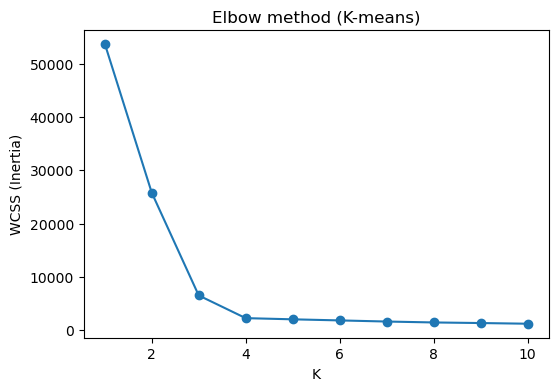

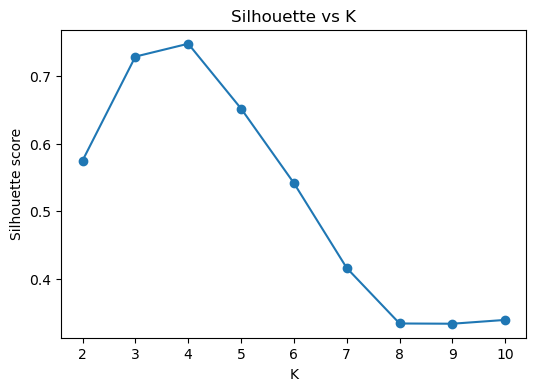

In [3]:
try:
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score

    X, _ = make_blobs(n_samples=800, centers=4, cluster_std=1.2, random_state=42)

    # Elbow (WCSS)
    Ks = range(1, 11)
    wcss = []
    for k in Ks:
        km = KMeans(n_clusters=k, n_init=10, random_state=42)
        km.fit(X)
        wcss.append(km.inertia_)

    plt.figure(figsize=(6,4))
    plt.plot(list(Ks), wcss, marker='o')
    plt.xlabel("K")
    plt.ylabel("WCSS (Inertia)")
    plt.title("Elbow method (K-means)")
    plt.show()

    # Silhouette for k>=2
    sil = []
    Ks2 = range(2, 11)
    for k in Ks2:
        km = KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
        sil.append(silhouette_score(X, km.labels_))

    plt.figure(figsize=(6,4))
    plt.plot(list(Ks2), sil, marker='o')
    plt.xlabel("K")
    plt.ylabel("Silhouette score")
    plt.title("Silhouette vs K")
    plt.show()
except Exception as e:
    print("Demo skipped:", e)


## Demo B) Hierarchical clustering dendrogram

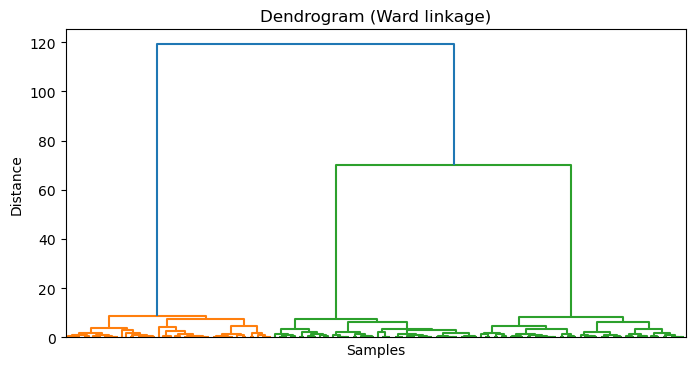

In [4]:
try:
    from sklearn.datasets import make_blobs
    from scipy.cluster.hierarchy import linkage, dendrogram

    X, _ = make_blobs(n_samples=150, centers=3, cluster_std=1.0, random_state=42)
    Z = linkage(X, method="ward")

    plt.figure(figsize=(8,4))
    dendrogram(Z, no_labels=True)
    plt.title("Dendrogram (Ward linkage)")
    plt.xlabel("Samples")
    plt.ylabel("Distance")
    plt.show()
except Exception as e:
    print("Demo skipped:", e)


## Demo C) DBSCAN clustering

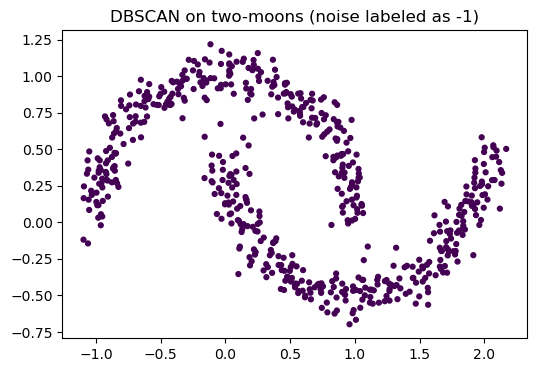

In [5]:
try:
    from sklearn.datasets import make_moons
    from sklearn.cluster import DBSCAN

    X, _ = make_moons(n_samples=600, noise=0.08, random_state=42)
    db = DBSCAN(eps=0.25, min_samples=8).fit(X)
    labels = db.labels_

    plt.figure(figsize=(6,4))
    plt.scatter(X[:,0], X[:,1], c=labels, s=12)
    plt.title("DBSCAN on two-moons (noise labeled as -1)")
    plt.show()
except Exception as e:
    print("Demo skipped:", e)


## Demo D) LOF and Isolation Forest (anomaly detection)

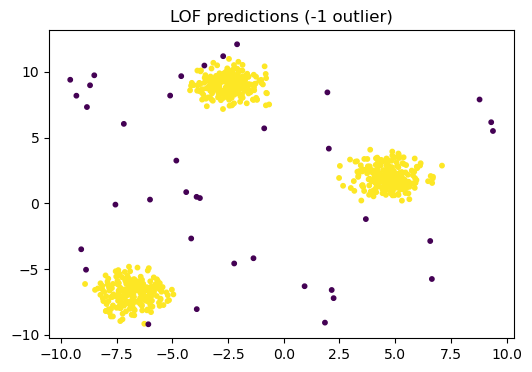

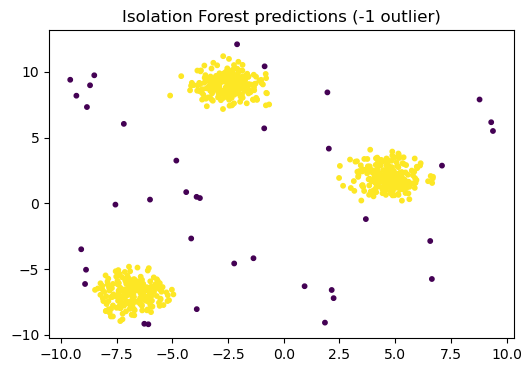

In [6]:
try:
    from sklearn.datasets import make_blobs
    from sklearn.neighbors import LocalOutlierFactor
    from sklearn.ensemble import IsolationForest

    X, _ = make_blobs(n_samples=700, centers=3, cluster_std=0.8, random_state=42)
    outliers = np.random.uniform(low=-10, high=10, size=(35, 2))
    X_all = np.vstack([X, outliers])

    lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
    lof_pred = lof.fit_predict(X_all)  # -1 outlier, 1 inlier

    iso = IsolationForest(contamination=0.05, random_state=42)
    iso_pred = iso.fit_predict(X_all)  # -1 outlier, 1 inlier

    plt.figure(figsize=(6,4))
    plt.scatter(X_all[:,0], X_all[:,1], c=lof_pred, s=10)
    plt.title("LOF predictions (-1 outlier)")
    plt.show()

    plt.figure(figsize=(6,4))
    plt.scatter(X_all[:,0], X_all[:,1], c=iso_pred, s=10)
    plt.title("Isolation Forest predictions (-1 outlier)")
    plt.show()
except Exception as e:
    print("Demo skipped:", e)


## Demo E) Stationarity test + ARIMA + Holt-Winters (synthetic series)

/var/folders/7_/1wxc_1j94cbd8y1bkg945yk00000gq/T/ipykernel_19596/3458490826.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  s = pd.Series(y, index=pd.date_range("2015-01-01", periods=n, freq="M"))


ADF p-value: 0.958122609655239


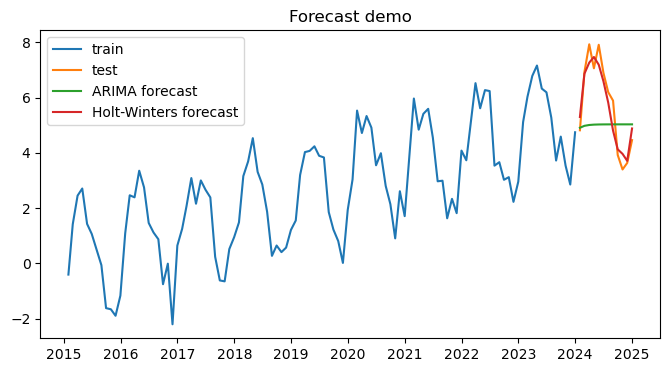

In [7]:
try:
    import pandas as pd
    from statsmodels.tsa.stattools import adfuller
    from statsmodels.tsa.arima.model import ARIMA
    from statsmodels.tsa.holtwinters import ExponentialSmoothing

    n = 120
    t = np.arange(n)
    y = 0.05*t + 2*np.sin(2*np.pi*t/12) + np.random.normal(0, 0.6, size=n)
    s = pd.Series(y, index=pd.date_range("2015-01-01", periods=n, freq="M"))

    adf_stat, pval, *_ = adfuller(s)
    print("ADF p-value:", pval)

    train, test = s.iloc[:-12], s.iloc[-12:]

    arima = ARIMA(train, order=(1,1,1)).fit()
    fc_arima = arima.forecast(steps=12)

    hw = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12).fit()
    fc_hw = hw.forecast(12)

    plt.figure(figsize=(8,4))
    plt.plot(train.index, train, label="train")
    plt.plot(test.index, test, label="test")
    plt.plot(test.index, fc_arima, label="ARIMA forecast")
    plt.plot(test.index, fc_hw, label="Holt-Winters forecast")
    plt.title("Forecast demo")
    plt.legend()
    plt.show()
except Exception as e:
    print("Demo skipped:", e)
